**Table of contents**<a id='toc0_'></a>    
- [Clustering with PCA](#toc1_)    
  - [Data preparation](#toc1_1_)    
  - [PCA](#toc1_2_)    
    - [PCA scatter plot](#toc1_2_1_)    
    - [Distance from centroid in training set](#toc1_2_2_)    
    - [Distance from centroid in test set](#toc1_2_3_)    
  - [Classification Algorithm](#toc1_3_)    
    - [$k = 2$](#toc1_3_1_)    
    - [Different values of $k$](#toc1_3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

#  [&#8593;](#toc0_) <a id='toc1_'></a>Clustering with PCA
The task for this exercise is to verify the ability of PCA in clustering data by projecting very high-dimensional datapoints to 2 or 3 dimensions. In particular, consider the dataset *MNIST* provided on Virtuale. This dataset contains images of handwritten digits with dimension $28 \times 28$, together with a number from $0$ to $9$ representing the label.

Load the dataset in memory and explore its head and shape to understand how the informations are
placed inside of it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load data into memory
data = pd.read_csv('data.csv')

# Inspect the data
print(f"Shape of the data: {data.shape}")
data.head()

Shape of the data: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  [&#8593;](#toc0_) <a id='toc1_1_'></a>Data preparation

Split the dataset into the $X$ matrix of dimension $d \times N$ , with $d = 784$ being the dimension of each
datum, $N$ is the number of datapoints, and $Y \in R^N$ containing the corresponding labels

In [28]:
X = np.array(data)[:,1:].T
Y = np.array(data)[:,0].T
print(X.shape)
print(Y.shape)

(784, 42000)
(42000,)


Choose a number of digits (for example, 0, 6 and 9) and extract from $X$ and $Y$ the sub-dataset
containing only the considered digits. Re-call $X$ and $Y$ those datasets, since the originals are not
required anymore

In [29]:
a,b,c = 0,6,9
X = X[:,(Y == a) | (Y == b) | (Y == c)]
Y = Y[(Y == a) | (Y == b) | (Y == c)]

N = X.shape[1]

Set $N_{train} < N$ and randomly sample a training set with $N_{train}$ datapoints from $X$ (and the cor-
responding $Y$ ). Call them $X_{train}$ and $Y_{train}$. Everything else is the test set. Call it $X_{test}$ and
$Y_{test}$

In [30]:
N_train = int(N * 0.8)
indices = np.arange(N)
np.random.shuffle(indices)

X_train = X[:,indices[:N_train]]
Y_train = Y[indices[:N_train]]

X_test = X[:,indices[N_train:]]
Y_test = Y[indices[N_train:]]

"""X_train = X[:,:N_train]
Y_train = Y[:N_train]

X_test = X[:,N_train:]
Y_test = Y[N_train:]"""


'X_train = X[:,:N_train]\nY_train = Y[:N_train]\n\nX_test = X[:,N_train:]\nY_test = Y[N_train:]'

##  [&#8593;](#toc0_) <a id='toc1_2_'></a>PCA

Implement the algorithms computing the PCA of $X_{train}$ with a fixed $k$. Visualize the results (for $k = 2$) and the position of the centroid of each cluster.

In [31]:
# Calcute the centroid of a matrix
def centroid(X):
    return np.mean(X,axis=1)

# Compute the truncated SVD
def k_rank_prof(x,k):
    m, n = x.shape
    U, s, VT = np.linalg.svd(x, full_matrices=True)
    # Get the full S matrix
    S = np.zeros((m, n))
    S[:min(m,n), :min(m,n)] = np.diag(s)
    return U[:, :k] , S[:k, :k] , VT[:k, :]

# Centered version of X_train
X_c = (X_train.T - centroid(X_train)).T

k = 2
U_k,S_k,VT_k = k_rank_prof(X_c, k)

###  [&#8593;](#toc0_) <a id='toc1_2_1_'></a>PCA scatter plot

Here we plot the dataset after the dimensionality reduction using `plt.scatter(X,Y)`, using different colors for the different classes. Each dot in this plot rapresent an image in the dataset after it's reduction to 2 dimensions. The blue dot inside each cluster is the centroid.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


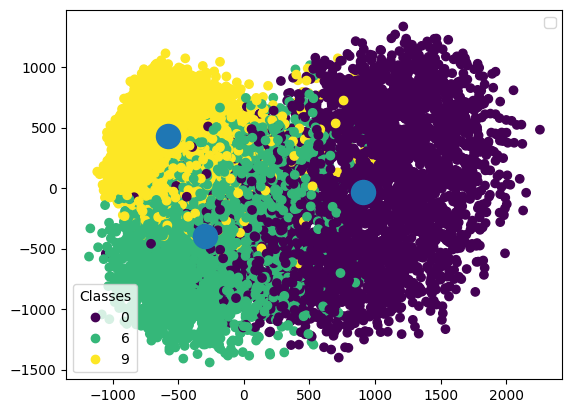

In [32]:
# Computing the projected dataset
Z_k = U_k.T @ X_c

# Plotting the centroid
Z_k_1 = Z_k[:,Y_train == a]
Z_k_2 = Z_k[:,Y_train == b]
Z_k_3 = Z_k[:,Y_train == c]

Z_k_1_centroid = centroid(Z_k_1)
Z_k_2_centroid = centroid(Z_k_2)
Z_k_3_centroid = centroid(Z_k_3)

XX = [Z_k_1_centroid[0], Z_k_2_centroid[0], Z_k_3_centroid[0]]
YY = [Z_k_1_centroid[1], Z_k_2_centroid[1], Z_k_3_centroid[1]]

fig, ax = plt.subplots()
# Plotting the projected dataset
scatter = ax.scatter(Z_k[0, :], Z_k[1, :], c=Y_train)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.legend()
ax.scatter(XX,YY, s=300)
plt.show()

###  [&#8593;](#toc0_) <a id='toc1_2_2_'></a>Distance from centroid in training set

Compute, for each cluster, the average distance from the centroid. Comment the result

In [33]:
print(f"Average distance from centroid in cluster 1: {np.mean(np.linalg.norm((Z_k_1.T-Z_k_1_centroid).T, axis=0))}")
print(f"Average distance from centroid in cluster 2: {np.mean(np.linalg.norm((Z_k_2.T-Z_k_2_centroid).T, axis=0))}")
print(f"Average distance from centroid in cluster 3: {np.mean(np.linalg.norm((Z_k_3.T-Z_k_3_centroid).T, axis=0))}")

Average distance from centroid in cluster 1: 725.9306495480449
Average distance from centroid in cluster 2: 541.0045198879417
Average distance from centroid in cluster 3: 366.76317589405033


**As we can see from these result and from the scatter plot, the first class (purple one) is the most scattered one.**

###  [&#8593;](#toc0_) <a id='toc1_2_3_'></a>Distance from centroid in test set

Compute, for each cluster, the average distance from the centroid on the test set. Comment the results

In [34]:
X_c = (X_test.T - centroid(X_test)).T
U_k,S_k,VT_k = k_rank_prof(X_c, k)

# Computing the projected dataset
Z_k_test = U_k.T @ X_c

# Plotting the centroid
Z_k_1_test = Z_k_test[:,Y_test == a]
Z_k_2_test = Z_k_test[:,Y_test == b]
Z_k_3_test = Z_k_test[:,Y_test == c]

Z_k_1_centroid_test = centroid(Z_k_1_test)
Z_k_2_centroid_test = centroid(Z_k_2_test)
Z_k_3_centroid_test = centroid(Z_k_3_test)

print(f"Average distance from centroid in cluster 1: {np.mean(np.linalg.norm((Z_k_1_test.T-Z_k_1_centroid_test).T, axis=0))}")
print(f"Average distance from centroid in cluster 2: {np.mean(np.linalg.norm((Z_k_2_test.T-Z_k_2_centroid_test).T, axis=0))}")
print(f"Average distance from centroid in cluster 3: {np.mean(np.linalg.norm((Z_k_3_test.T-Z_k_3_centroid_test).T, axis=0))}")

Average distance from centroid in cluster 1: 753.0292750365147
Average distance from centroid in cluster 2: 518.0308631907894
Average distance from centroid in cluster 3: 344.4849666292155


**As we can see from this results, the average distance from the centroid of the cluster using the test-set is very similar to the one obtained using the train-set.**

##  [&#8593;](#toc0_) <a id='toc1_3_'></a>Classification Algorithm

###  [&#8593;](#toc0_) <a id='toc1_3_1_'></a>$k = 2$

Define a classification algorithm in this way: given a new observation $x$, compute the distance between
$x$ and each cluster centroid. Assign $x$ to the class corresponding the the closer centroid. Compute the
accuracy of this algorithm on the test set and compute its accuracy

In [35]:
# Returns the index of the closest centroid
def classify(x, c1, c2, c3):
    d1 = np.linalg.norm(x-c1,2)
    d2 = np.linalg.norm(x-c2,2)
    d3 = np.linalg.norm(x-c3,2)

    return [d1,d2,d3].index(min([d1,d2,d3]))

correct = 0

# Classify the training data
correct += np.sum([classify(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 0 for x in Z_k_1_test.T])
correct += np.sum([classify(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 1 for x in Z_k_2_test.T])
correct += np.sum([classify(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 2 for x in Z_k_3_test.T])

print(f"Algorithm accuracy {correct / (len(Z_k_1_test.T) + len(Z_k_2_test.T) + len(Z_k_3_test.T))*100} %")

Algorithm accuracy 85.39325842696628 %


###  [&#8593;](#toc0_) <a id='toc1_3_2_'></a>Different values of $k$

Repeat this experiment for different values of $k$ and different digits. What do you observe?

In [36]:
kk = [1,2,3,4,5,10,20,50,100,120,140,160,180,200]
accuracies = []

for k in tqdm(kk):
    X_c = (X_train.T - centroid(X_train)).T
    U_k,S_k,VT_k = k_rank_prof(X_c, k)

    # Computing the projected dataset
    Z_k = U_k.T @ X_c

    # Calculating the centroid
    Z_k_1 = Z_k[:,Y_train == a]
    Z_k_2 = Z_k[:,Y_train == b]
    Z_k_3 = Z_k[:,Y_train == c]

    Z_k_1_centroid = centroid(Z_k_1)
    Z_k_2_centroid = centroid(Z_k_2)
    Z_k_3_centroid = centroid(Z_k_3)

    X_c = (X_test.T - centroid(X_test)).T
    U_k,S_k,VT_k = k_rank_prof(X_c, k)

    # Computing the projected dataset
    Z_k_test = U_k.T @ X_c

    # Calculating the centroid
    Z_k_1_test = Z_k_test[:,Y_test == a]
    Z_k_2_test = Z_k_test[:,Y_test == b]
    Z_k_3_test = Z_k_test[:,Y_test == c]

    Z_k_1_centroid_test = centroid(Z_k_1_test)
    Z_k_2_centroid_test = centroid(Z_k_2_test)
    Z_k_3_centroid_test = centroid(Z_k_3_test)

    correct = 0
    
    correct += np.sum([classify(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 0 for x in Z_k_1_test.T])
    correct += np.sum([classify(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 1 for x in Z_k_2_test.T])
    correct += np.sum([classify(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 2 for x in Z_k_3_test.T])

    accuracy = correct / (len(Z_k_1_test.T) + len(Z_k_2_test.T) + len(Z_k_3_test.T))
    accuracies.append(accuracy)

100%|██████████| 14/14 [04:18<00:00, 18.43s/it]


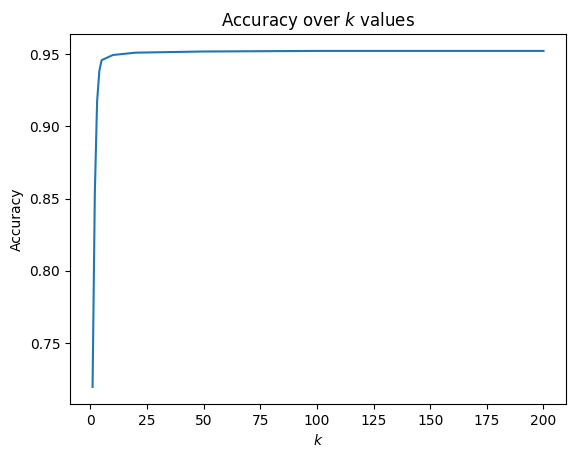

In [38]:
plt.plot(kk,accuracies)
plt.title('Accuracy over $k$ values')
plt.xlabel('$k$')
plt.ylabel('Accuracy')
plt.plot();

**As we can see in the above graph, the accuracy reaches the upper limit with values of $k \approx 10$. Using values of $k \gt 10$ gives almost no advantages.**

**This means that the accuracy off the clustering classification can't exceed an accuracy value of $95 \%$**